In [2]:
# clear all the variables
%reset -f

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
# define function to return gbm
def computeGBM(T, mu, sigma, dt = 0.01, S0 = 1):   
    N = round(T/dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W) * np.sqrt(dt) ### standard brownian motion ###
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W) ### geometric brownian motion ###
    
    return [t, S]

c:\program files\nomura\fingal64\python\python27\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


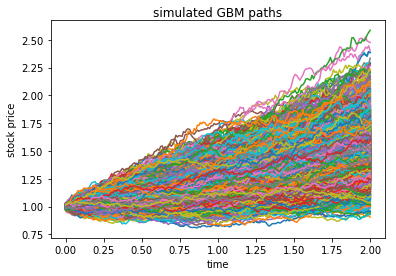

In [5]:
# number of simulations
nSimul = 5000
T = 1
mu = 0.2
sigma = 0.1
dt = 0.01

data = []
for t in range(1,nSimul):
    t, S = computeGBM(2, mu, sigma, dt)
    data = data + plt.plot(t, S)

plt.title("simulated GBM paths")
plt.xlabel("time")
plt.ylabel("stock price")
plt.show()

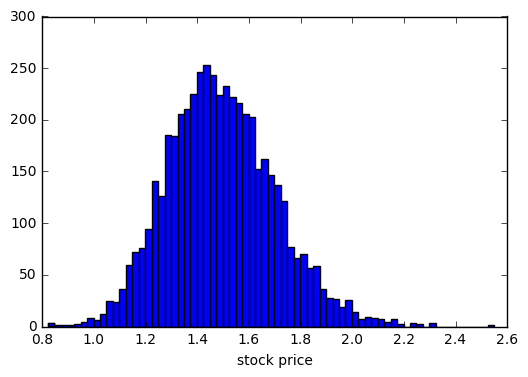

In [5]:
# create an histogram with terminal points distribution
f = lambda x:x.get_ydata()[-1]
x = list(map(f, data))

# create the histogram
binwidth = 0.025
plt.hist(x, bins=np.arange(min(x), max(x) + binwidth, binwidth))
plt.xlabel("stock price")
plt.show()

In [6]:
# imply the starting parameters
# TODO
print("estimated sigma: {0}".format(np.log(np.std(x)) + 0.5))
print("estimated mu: {0}".format(np.mean(x) - 0.5 * np.std(x)**2 - 1))

estimated sigma: -1.0709273777570363
estimated mu: 0.4713414213604621
